# Deaths Trends of Hispanic Women in NYC

This projects aims to analyze and discuss New York City Leading Causes of Death within hispanic women based on the dataset from NYC data found here:
https://data.cityofnewyork.us/Health/New-York-City-Leading-Causes-of-Death/jb7j-dtam/about_data

## Loading Librabires and Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np
 
%matplotlib inline

## Cleaning Data

In [2]:
Nyc_Deaths_Missing_filter = pd.read_csv("New_York_City_Leading_Causes_of_Death.csv", na_values = ["-","."])
Nyc_Deaths_filter = Nyc_Deaths_Missing_filter.dropna()
# Creating new dataset without missing data. 

In [3]:
Nyc_Deaths_filter

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
0,2011,"Nephritis, Nephrotic Syndrome and Nephrisis (N...",F,Black Non-Hispanic,83.0,7.9,6.9
1,2009,Human Immunodeficiency Virus Disease (HIV: B20...,F,Hispanic,96.0,8.0,8.1
2,2009,Chronic Lower Respiratory Diseases (J40-J47),F,Hispanic,155.0,12.9,16.0
3,2008,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",F,Hispanic,1445.0,122.3,160.7
4,2009,Alzheimer's Disease (G30),F,Asian and Pacific Islander,14.0,2.5,3.6
...,...,...,...,...,...,...,...
1088,2010,"Intentional Self-Harm (Suicide: X60-X84, Y87.0)",M,Asian and Pacific Islander,46.0,8.8,8.7
1089,2013,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Black Non-Hispanic,1868.0,217.7,258.5
1090,2008,Diabetes Mellitus (E10-E14),M,Hispanic,191.0,17.3,31.3
1092,2008,Chronic Lower Respiratory Diseases (J40-J47),M,Asian and Pacific Islander,46.0,9.2,16.1


This data set has been filtered to remove missing data marked as ".", using the dropna parameter. 

In [4]:
death_cause_map = {"Chronic Lower Respiratory Diseases (J40-J47)":"Respiratory Diseases",
    "Diseases of Heart (I00-I09, I11, I13, I20-I51)":"Heart Diseases",
    "Essential Hypertension and Renal Diseases (I10, I12)":"Essential Hypertension and Renal Diseases",
    "Malignant Neoplasms (Cancer: C00-C97)":"Cancer",
    "Influenza (Flu) and Pneumonia (J09-J18)":"Influenza(Flu) and Pneumonia",
    "Diabetes Mellitus (E10-E14)":"Diabetes",
    "Cerebrovascular Disease (Stroke: I60-I69)":"Stroke",
    "Accidents Except Drug Posioning (V01-X39, X43, X45-X59, Y85-Y86)":"Accidents Except Drug Posioning",
    "Alzheimer's Disease (G30)":"Alzheimer",
    "Human Immunodeficiency Virus Disease (HIV: B20-B24)":"HIV",
    "Chronic Liver Disease and Cirrhosis (K70, K73)":"Chronic Liver Disease and Cirrhosis",
    "Mental and Behavioral Disorders due to Accidental Poisoning and Other Psychoactive Substance Use (F11-F16, F18-F19, X40-X42, X44)":"Substance-Related Disorders",
    "Septicemia (A40-A41)":"Septicemia"}

This renames the leading causes of death reported, to make it easier to read and interpret while vizualizing.

In [5]:
Nyc_Deaths_filter["Leading Cause"] = Nyc_Deaths_filter["Leading Cause"].map(death_cause_map)

/var/folders/p9/vypm9_rx4wvd1fsjy6l14m2r0000gn/T/ipykernel_38126/267376278.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Nyc_Deaths_filter["Leading Cause"] = Nyc_Deaths_filter["Leading Cause"].map(death_cause_map)


In [6]:
Nyc_Deaths = Nyc_Deaths_filter

In [7]:
Hispanic_filter = Nyc_Deaths["Race Ethnicity"] == "Hispanic"
Gender_filter = Nyc_Deaths["Sex"] == "F"
nyc_sub = Nyc_Deaths[Hispanic_filter & Gender_filter]
## Subseting data for hispanic women/girls

In [8]:
nyc_sub

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
1,2009,HIV,F,Hispanic,96.0,8.0,8.1
2,2009,Respiratory Diseases,F,Hispanic,155.0,12.9,16.0
3,2008,Heart Diseases,F,Hispanic,1445.0,122.3,160.7
12,2013,Alzheimer,F,Hispanic,120.0,9.6,11.0
14,2009,Essential Hypertension and Renal Diseases,F,Hispanic,84.0,7.0,8.8
...,...,...,...,...,...,...,...
973,2010,Cancer,F,Hispanic,1045.0,85.9,98.5
1043,2009,Stroke,F,Hispanic,154.0,12.9,16.0
1072,2010,Stroke,F,Hispanic,168.0,13.8,16.7
1075,2010,Influenza(Flu) and Pneumonia,F,Hispanic,228.0,18.7,23.1


## Data Visualization

### Graph showing the change in deaths of Hispanic women in NYC in between the years 2007 - 2014

/var/folders/p9/vypm9_rx4wvd1fsjy6l14m2r0000gn/T/ipykernel_38126/3499606.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = "Year", y = "Deaths", ci = None, data = nyc_sub)


Text(0, 0.5, 'Number of Deaths')

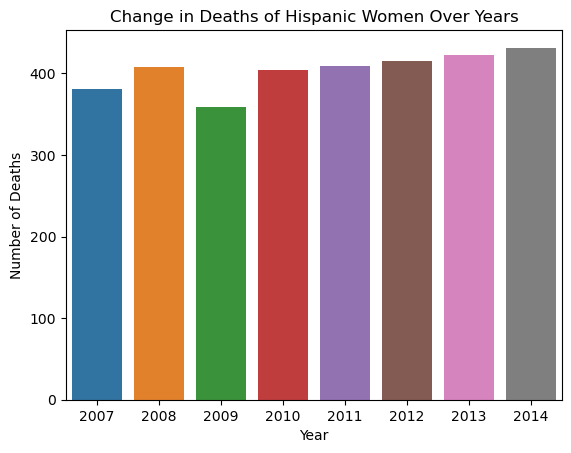

In [9]:
sns.barplot(x = "Year", y = "Deaths", ci = None, data = nyc_sub)  
plt.title("Change in Deaths of Hispanic Women Over Years")  
plt.xlabel("Year")  
plt.ylabel("Number of Deaths")  

This graph shows the death rates of hispanic women inbetween the years 2007 - 2014. Peaking in 2008, before having a drop in the 2009. From then the number of deaths show of trend of increasing each year. 

### Graph of the Age Adjusted Death Rate

Text(0, 0.5, 'Frequency')

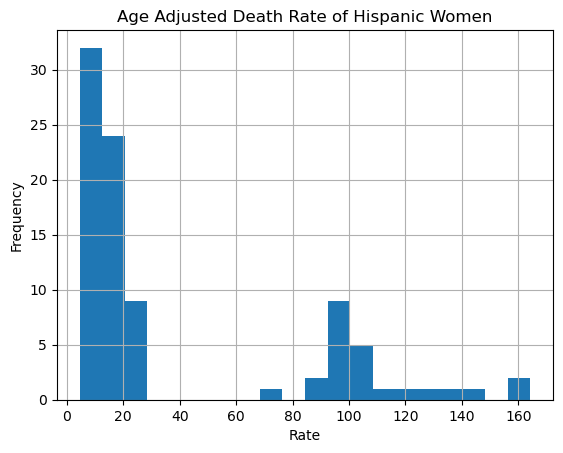

In [10]:
nyc_sub["Age Adjusted Death Rate"].hist(bins = 20)
plt.title("Age Adjusted Death Rate of Hispanic Women")  
plt.xlabel("Rate")  
plt.ylabel("Frequency")  

Showing the age adjusted Death Rate of Hispanic Women in NYC, we can see that the data is skewed to right, Implying that the majority of age-adjusted death rates are higher. This could suggest that certain health conditions or social determinants disproportionately affecting the mortality rates of Hispanic women, leading to a higher prevalence of higher death rates within this demographic.

### Trend of Age-Adjusted Death Rates for Hispanic Women in NYC

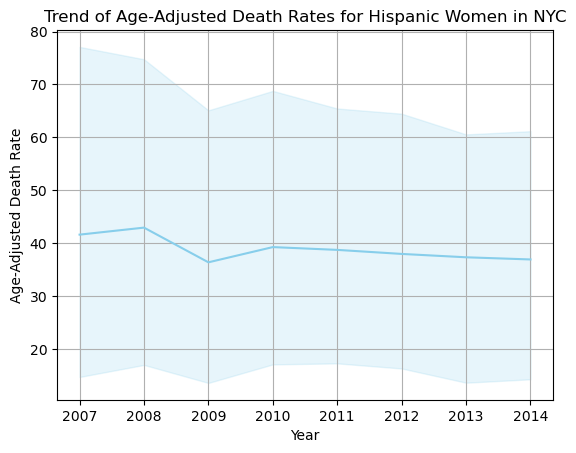

In [11]:
sns.lineplot(x = "Year", y = "Age Adjusted Death Rate", data = nyc_sub, color = "skyblue")
plt.title("Trend of Age-Adjusted Death Rates for Hispanic Women in NYC")
plt.xlabel("Year")
plt.ylabel("Age-Adjusted Death Rate")
plt.grid(True)

The age adjusted death rates of hispanic women here are similar to the previous graphs. Showing an increase in the year 2008, with a decrease in 2009. Followed by a relativly steady decrease from 2010 onwards. 

### Change in Deaths Over Years, Colored by Race

/var/folders/p9/vypm9_rx4wvd1fsjy6l14m2r0000gn/T/ipykernel_38126/1617406703.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = "Year", y = "Deaths", hue = "Race Ethnicity", ci = None, data = Nyc_Deaths)


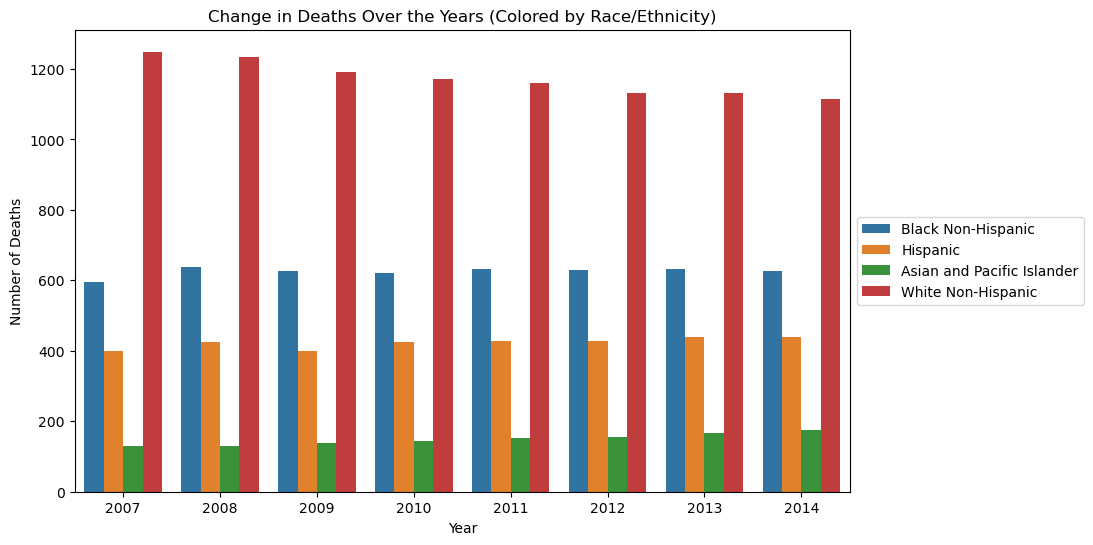

In [12]:
plt.figure(figsize = (10, 6))
sns.barplot(x = "Year", y = "Deaths", hue = "Race Ethnicity", ci = None, data = Nyc_Deaths)
plt.title("Change in Deaths Over the Years (Colored by Race/Ethnicity)")
plt.xlabel("Year")
plt.ylabel("Number of Deaths")
plt.legend(loc = "center left", bbox_to_anchor=(1, 0.5))

This graph shows the number of deaths over the years, but with relation to the other race/ehtnicities present. Notably we can see that white non hispanic people have the highest death rates from the data-set. Followed by Black non-hispanics. Likely a result of the population size differences in NYC. The same trends from the other graphs are still present here. 

### Difference in Deaths by Race, Colored by Gender

In [13]:
hispanic_data = Nyc_Deaths[(Nyc_Deaths["Race Ethnicity"] == "Hispanic")]

In [14]:
grouped_data = Nyc_Deaths.groupby(["Race Ethnicity", "Sex"])["Deaths"].sum().reset_index()

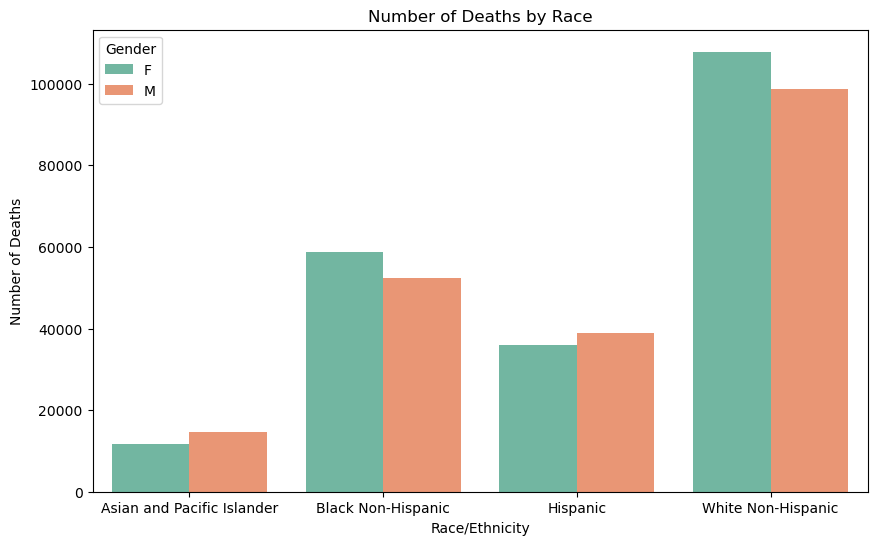

In [15]:
plt.figure(figsize = (10, 6))
sns.barplot(data = grouped_data, x = "Race Ethnicity", y = "Deaths", hue = "Sex", palette = "Set2")
plt.title("Number of Deaths by Race")
plt.xlabel("Race/Ethnicity")
plt.ylabel("Number of Deaths")
plt.legend(title = "Gender") 

Similar to the last graph in theme, however, focuses on the differences within sex. Some of the noteworthy trends that are noticale is how for Asian and specific islander, and Hispanic people there are more deaths of men reported relative to women. On the other hand white, and Black groups observe more deaths of women.

### Heatmap of Leading causes of death across Race and Gender

In [16]:
pivot_table = Nyc_Deaths.pivot_table(index='Leading Cause', columns=['Race Ethnicity', 'Sex'], values='Deaths', aggfunc='sum')

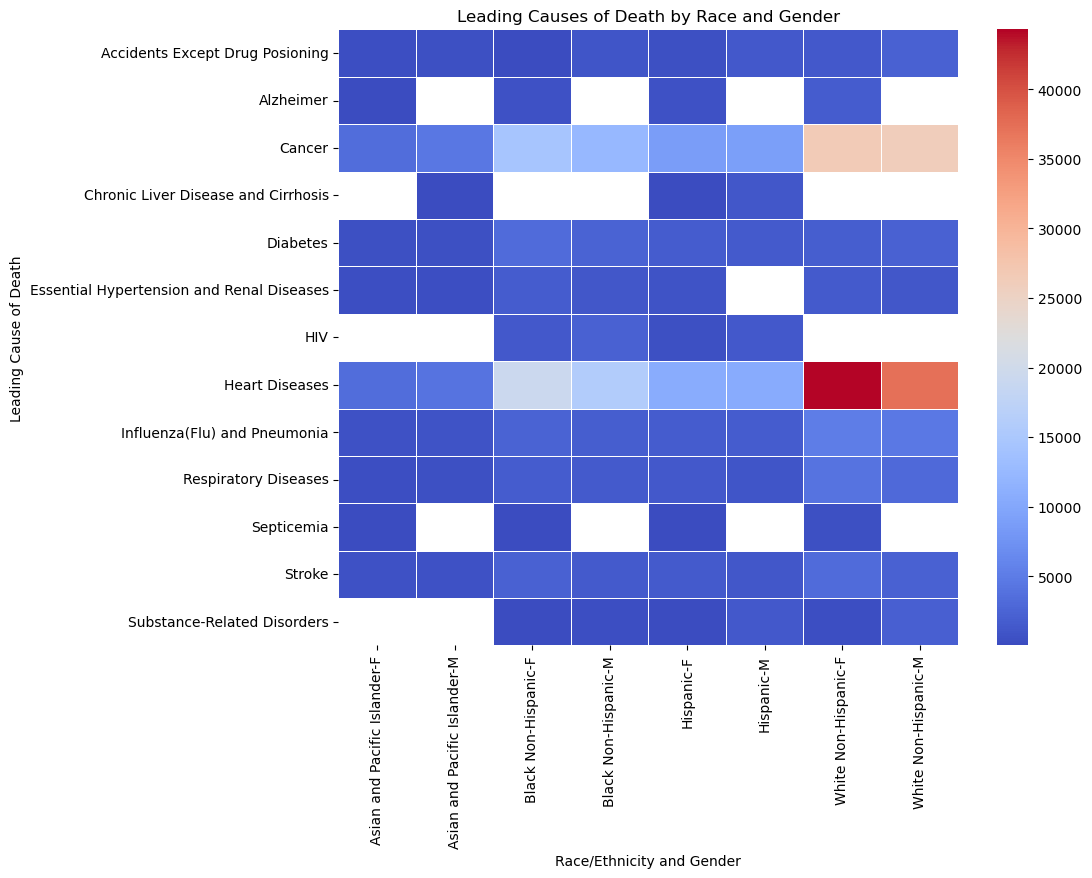

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, cmap = "coolwarm", fmt = ".0f", linewidths = 0.5)
plt.title('Leading Causes of Death by Race and Gender')
plt.xlabel('Race/Ethnicity and Gender')
plt.ylabel('Leading Cause of Death')
plt.show()

This is to focus specifically on what is the highest leading cause of deaths, from each racial group observed with regards to gender. Hispanic, and Black,  men and women both notably have lower rates of both Heart and Cancer. While these significantly impact white men and women. One There are a few groups that don't have enough data for certain causes of deaths, which is a limitation of this dataset. 

## Prediction Models

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [19]:
nyc_sub_dum = pd.get_dummies(hispanic_data, columns = ["Sex", "Leading Cause"], drop_first = True)

In [20]:
nyc_sub_dum.rename(columns={"Death Rate": "Death_Rate"}, inplace=True)

In [21]:
x = nyc_sub_dum.drop(columns = ["Year", "Death_Rate", "Age Adjusted Death Rate", "Race Ethnicity"])
x.head()

,Deaths,Sex_M,Leading Cause_Alzheimer,Leading Cause_Cancer,Leading Cause_Chronic Liver Disease and Cirrhosis,Leading Cause_Diabetes,Leading Cause_Essential Hypertension and Renal Diseases,Leading Cause_HIV,Leading Cause_Heart Diseases,Leading Cause_Influenza(Flu) and Pneumonia,Leading Cause_Respiratory Diseases,Leading Cause_Septicemia,Leading Cause_Stroke,Leading Cause_Substance-Related Disorders
1,96.0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,155.0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1445.0,0,0,0,0,0,0,0,1,0,0,0,0,0
12,120.0,0,1,0,0,0,0,0,0,0,0,0,0,0
14,84.0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [22]:
y = nyc_sub_dum["Death_Rate"]
y

1         8.0
2        12.9
3       122.3
12        9.6
14        7.0
        ...  
1072     13.8
1075     18.7
1082    107.3
1085     91.1
1090     17.3
Name: Death_Rate, Length: 177, dtype: float64

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [24]:
lin_model = LinearRegression()
lin_model.fit(x_train, y_train)

LinearRegression()

In [25]:
y_train_pred = lin_model.predict(x_train)
y_test_pred = lin_model.predict(x_test)

In [26]:
mean_squared_error(y_train_pred, y_train)

3.665117731721906

In [27]:
mean_squared_error(y_test_pred, y_test)

3.630066043450039

Since this value is low, it indicates that the model's predictions are close to the actual values on average for the training data. The training MSE is slightly higher than the training MSE, which is a common observation. It might suggest slight overfitting in the  the model performance.

In [28]:
tree3 = DecisionTreeRegressor(max_depth = 5)
tree3.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [30]:
train_preds3 = tree3.predict(x_train)
test_preds3 = tree3.predict(x_test)

In [31]:
mean_squared_error(train_preds3,y_train)

0.7342470551513107

In [32]:
mean_squared_error(test_preds3,y_test)

2.72027125229568

Training MSE: The MSE on the training data is approximately 0.7342. This indicates that, on average, the squared difference between the actual and predicted death rates on the training data is around 0.7342.

Testing MSE: The MSE on the testing data is approximately 1.8492. This indicates that, on average, the squared difference between the actual and predicted death rates on the testing data is around 2.7203. 

Overall, the decision tree regression model with max_depth = 5 shows promising performance with decently low MSE values on both training and testing data

### Principal Component Analysis (PCA)

In [33]:
scaler = StandardScaler()
scaler

StandardScaler()

In [34]:
scaled_features = scaler.fit_transform(x)
scaled_features

array([[-0.71535442, -0.99436615, -0.18731716, ..., -0.07537784,
        -0.31524416, -0.25742001],
       [-0.58613031, -0.99436615, -0.18731716, ..., -0.07537784,
        -0.31524416, -0.25742001],
       [ 2.23927837, -0.99436615, -0.18731716, ..., -0.07537784,
        -0.31524416, -0.25742001],
       ...,
       [ 1.88007912,  1.00566577, -0.18731716, ..., -0.07537784,
        -0.31524416, -0.25742001],
       [ 1.60191874, -0.99436615, -0.18731716, ..., -0.07537784,
        -0.31524416, -0.25742001],
       [-0.50728169,  1.00566577, -0.18731716, ..., -0.07537784,
        -0.31524416, -0.25742001]])

In [35]:
pca = PCA(n_components=2)
pca.fit(scaled_features)
nyc_pca = pca.transform(scaled_features)

In [36]:
nyc_pca_df = pd.DataFrame(nyc_pca, columns = ["PC1","PC2"])

In [37]:
nyc_pca_df["Year"] = nyc_sub["Year"]

Text(0, 0.5, 'PC2')

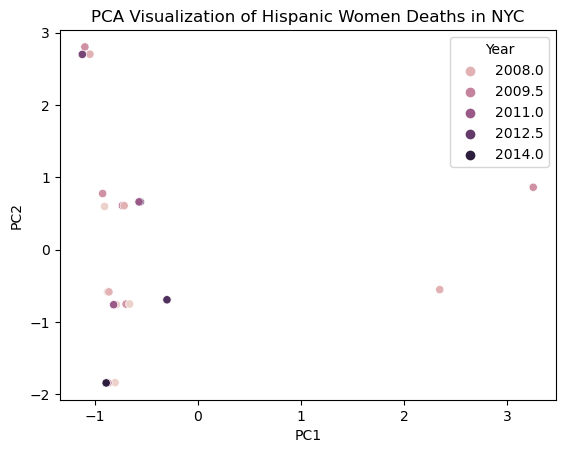

In [38]:
sns.scatterplot(x = "PC1", y = "PC2", hue = "Year", data = nyc_pca_df)
plt.title("PCA Visualization of Hispanic Women Deaths in NYC")
plt.xlabel("PC1")
plt.ylabel("PC2")

This doesn't seem to be the best clusting method as there seems to be some overlapping within the scatterplot. 

### Hypothesis Testing 

Null Hypothesis: The proportion of Hispanic individuals in the population is consistent with the hypothesized probability distribution, where the probability of being Hispanic is 0.25.

Alternative Hypothesis: The proportion of Hispanic individuals in the population deviates significantly from the hypothesized probability distribution.

In [39]:
Hispanic_deaths = Nyc_Deaths[Nyc_Deaths["Race Ethnicity"] == "Hispanic"]

In [40]:
population = ["Hispanic", "Non-Hispanic"] 
pop_prob = [0.25,1-0.25]

In [41]:
counts = []
for i in range(10000):
    sample = np.random.choice(population, p= pop_prob, size = 708)
    sample_counts = pd.Series(sample).value_counts()
    counts.append(sample_counts["Hispanic"])

Text(0, 0.5, 'Frequency')

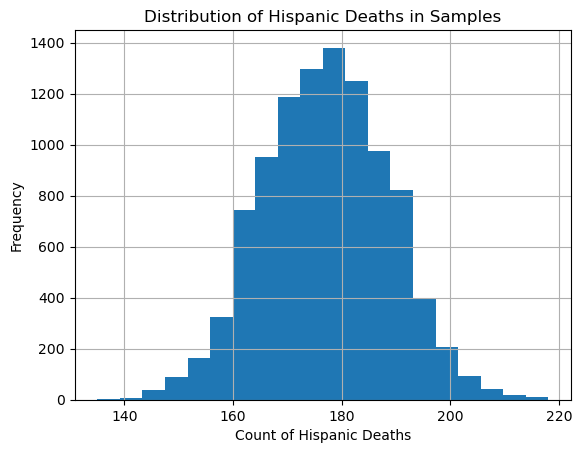

In [42]:
pd.Series(counts).hist(bins = 20)
plt.title("Distribution of Hispanic Deaths in Samples")
plt.xlabel("Count of Hispanic Deaths")
plt.ylabel("Frequency")